## Machine Learning Lab Assignment - 4

**Author** - Tirth Modi (202201513)

### Question 1:
Generate 100 real number for the variable X from the uniform distribution U [0,1]. Construct the training set T = { (x1,y1),(x2,y2),......,(x100,y100)} using the relation:

Yi = sin(2 π xi) + εi where εi ~ N(0,0.25).

In the similar way construct a testing set of size 50 i,e. Test = { (x1,y1),(x2,y2),......,(x50,y50)}. Fit Artificial Neural Network of single hidden layer with 10 number of neurons and plot estimates on
testing set. Also compute the RMSE, MAE, MAPE, NMSE and R2.

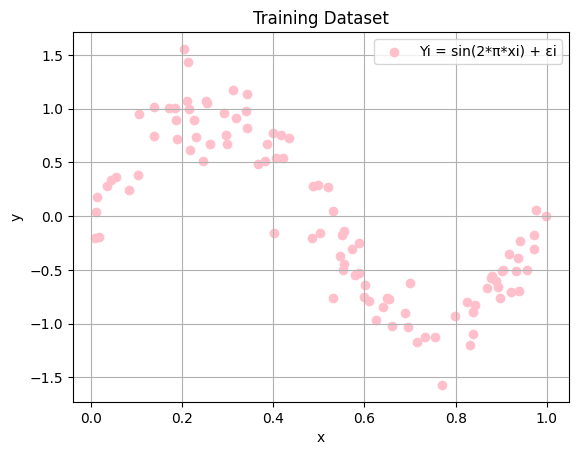

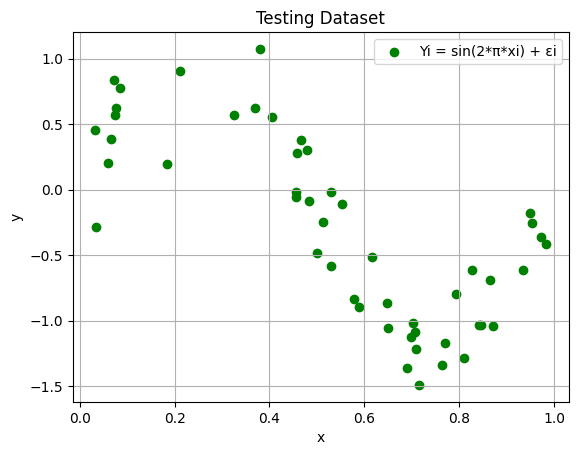

2/2 [==============================] - 0s 7ms/step


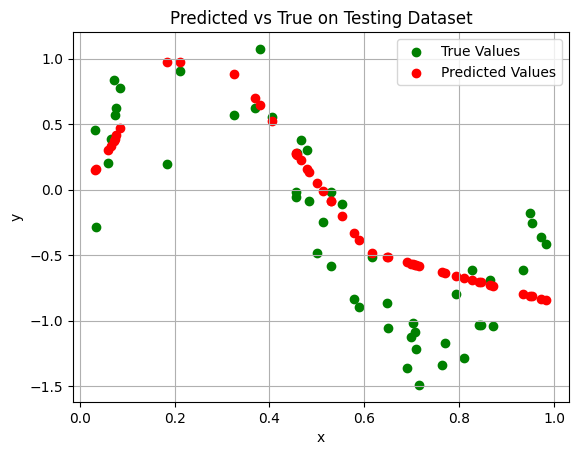

RMSE: 0.41716011778229606
MAE: 0.34974959662790084
MAPE: 261.87222467525163%
NMSE: 0.35292051336959535
R²: 0.6470794866304046


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dataset generation
def uniform_dataset(low, high, size):
    return np.random.uniform(low, high, size)

def normal_dataset(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

# Training Dataset
x1 = uniform_dataset(0, 1, 100)
noise1 = normal_dataset(0, 0.25, 100)

y1 = np.sin(2*np.pi*x1) + noise1

# Plotting
plt.scatter(x1, y1, label='Yi = sin(2*π*xi) + εi', color='pink')
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Testing Dataset
x2 = uniform_dataset(0, 1, 50)
noise2 = normal_dataset(0, 0.25, 50)

y2 = np.sin(2*np.pi*x2) + noise2

# Plotting
plt.scatter(x2, y2, label='Yi = sin(2*π*xi) + εi', color='green')
plt.title('Testing Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Prepare datasets for training (reshaping)
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Build a neural network with Keras
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))  # Input Layer
for i in range(4):
    model.add(Dense(10, activation='relu'))  # Hidden Layers
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x1, y1, epochs=100, verbose=0)

# Predict on the testing set
y_pred = model.predict(x2)

# Plot predictions on the testing set
plt.scatter(x2, y2, label='True Values', color='green')
plt.scatter(x2, y_pred, label='Predicted Values', color='red')
plt.title('Predicted vs True on Testing Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Performance metrics
rmse = np.sqrt(mean_squared_error(y2, y_pred))
mae = mean_absolute_error(y2, y_pred)
mape = np.mean(np.abs((y2 - y_pred) / y2)) * 100
nmse = mean_squared_error(y2, y_pred) / np.var(y2)
r2 = r2_score(y2, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'NMSE: {nmse}')
print(f'R²: {r2}')

### Question 2:
Add outliers to training set T :- Modify the training set T by picking up randomly 15 data points from the training set T and scale their yi values by 20. Fit Artificial Neural Network of single hidden layer with 10 number of neurons and plot estimates on testing set. Also compute the RMSE, MAE, MAPE, NMSE and R2. Comment upon the efficiency of least square loss in presence of outliers.

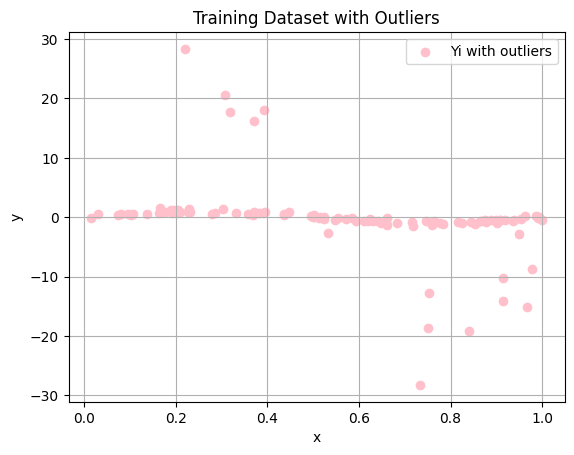

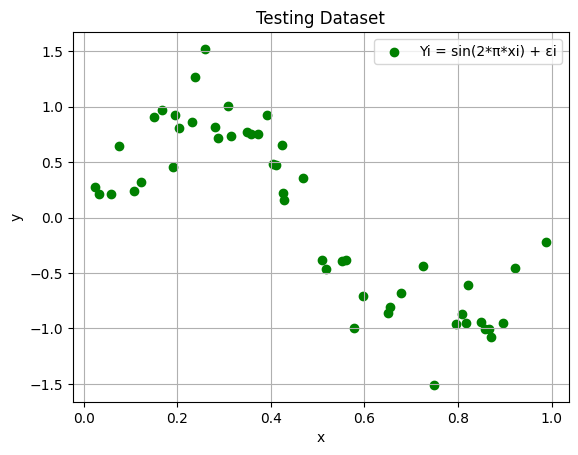

2/2 [==============================] - 0s 3ms/step


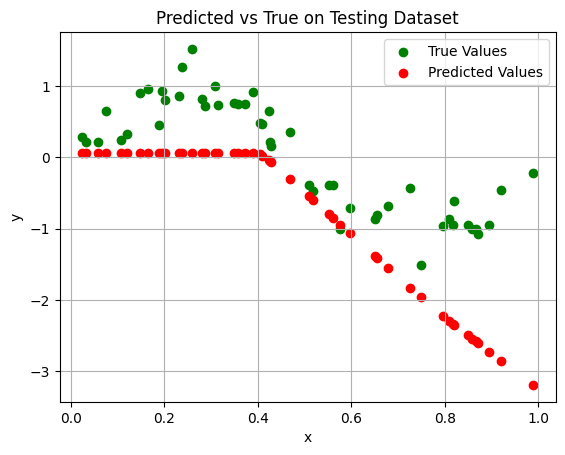

RMSE: 1.0350672599409192
MAE: 0.8384293993221558
MAPE: 219.6479647581151%
NMSE: 1.7928346569682834
R²: -0.7928346569682834


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Helper functions for dataset generation
def uniform_dataset(low, high, size):
    return np.random.uniform(low, high, size)

def normal_dataset(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

# Training Dataset
x1 = uniform_dataset(0, 1, 100)
noise1 = normal_dataset(0, 0.25, 100)

y1 = np.sin(2*np.pi*x1) + noise1

# Add outliers by scaling 15 random points by a factor of 20
outlier_indices = np.random.choice(range(100), 15, replace=False)
y1[outlier_indices] *= 20

# Plotting the Training Data with outliers
plt.scatter(x1, y1, label='Yi with outliers', color='pink')
plt.title('Training Dataset with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Testing Dataset
x2 = uniform_dataset(0, 1, 50)
noise2 = normal_dataset(0, 0.25, 50)

y2 = np.sin(2*np.pi*x2) + noise2

# Plotting
plt.scatter(x2, y2, label='Yi = sin(2*π*xi) + εi', color='green')
plt.title('Testing Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Prepare datasets for training (reshaping)
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

# Build a neural network with Keras
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))  # Input Layer
for i in range(4):                                                  
    model.add(Dense(10, activation='relu'))  # Hidden Layers
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x1, y1, epochs=100, verbose=0)

# Predict on the testing set
y_pred = model.predict(x2)

# Plot predictions on the testing set
plt.scatter(x2, y2, label='True Values', color='green')
plt.scatter(x2, y_pred, label='Predicted Values', color='red')
plt.title('Predicted vs True on Testing Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Performance metrics
rmse = np.sqrt(mean_squared_error(y2, y_pred))
mae = mean_absolute_error(y2, y_pred)
mape = np.mean(np.abs((y2 - y_pred) / y2)) * 100
nmse = mean_squared_error(y2, y_pred) / np.var(y2)
r2 = r2_score(y2, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'NMSE: {nmse}')
print(f'R²: {r2}')

### Question 3:
Consider the Boston Housing Dataset. Divide the dataset in training, validation and testing sets. Train ANN using training set, tune parameters of ANN using validation set and evaluate the model on testing set. After tuning the best parameter on validation set, report the RMSE, MAE, MAPE, NMSE and on R2 testing set.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from the CSV file
df = pd.read_csv('BostonHousing.csv')

# Assuming the 14th column (index 13) is the target variable and the first 13 are features
X = df.iloc[:, :-1].values  # First 13 columns as features
y = df.iloc[:, -1].values   # 14th column as the target

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the Artificial Neural Network (ANN)
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 64 neurons
    for _ in range(4):
        model.add(Dense(32, activation='relu'))  # Hidden layers with 32 neurons
    model.add(Dense(1, activation='linear'))  # Output layer

    model.compile(optimizer='adam', loss='mse')
    
    return model

# Create the model
model = build_model()

# Train the model on the training set and validate on the validation set
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

# After tuning, evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
nmse = mean_squared_error(y_test, y_pred) / np.var(y_test)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'NMSE: {nmse}')
print(f'R²: {r2}')

4/4 [==============================] - 0s 2ms/step
RMSE: 3.481445290093037
MAE: 2.259362344180836
MAPE: 52.257205180874834%
NMSE: 0.1411494653097658
R²: 0.8588505346902342
